<a href="https://colab.research.google.com/github/kitigai/LearnDL/blob/master/DeepNNBasics_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1wAc2z2MujKT3dPoP8Ts8oq2pCx4EFmeo)

Normalization technique Normalizes Mean and Variant in Input layers and improve learning speed. Batch Normalization allows using normalization not only input layer but also any other layers. 


# New Section

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


Using TensorFlow backend.


In [3]:
#load data sample
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


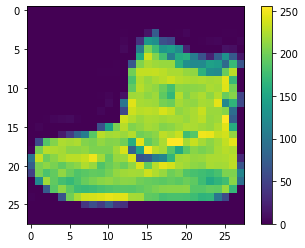

In [5]:
#plot sample image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#shift image values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
#build model that has 1 hidden layer with 128 nodes and has 10 classes output
# apply Dropout to hidden layer to reduce overfitting
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#compile
model.compile(
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

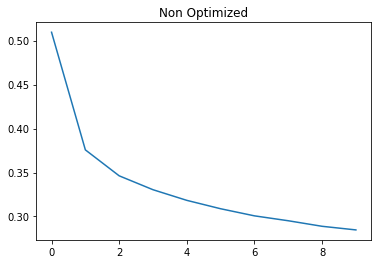

In [36]:
#train model
history = model.fit(train_images, train_labels, epochs=10, verbose=0)
plt.plot(np.squeeze(history.history["loss"]))
plt.title("Non Optimized")
plt.show()

In [37]:
# accuracy test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nUnOptimized \nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.4251 - accuracy: 0.8734

UnOptimized 
Test accuracy: 0.8733999729156494


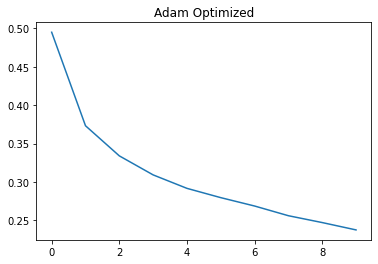

313/313 - 0s - loss: 0.3339 - accuracy: 0.8881

UnOptimized 
Test accuracy: 0.8881000280380249


In [38]:
# make model with adam optimization
adam_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#compile
adam_model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#train model
history = adam_model.fit(train_images, train_labels, epochs=10, verbose=0)
plt.plot(np.squeeze(history.history["loss"]))
plt.title("Adam Optimized")
plt.show()
# accuracy test
test_loss, test_acc = adam_model.evaluate(test_images,  test_labels, verbose=2)
print('\nUnOptimized \nTest accuracy:', test_acc)

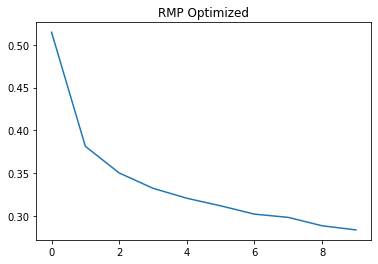

313/313 - 0s - loss: 0.4297 - accuracy: 0.8739

UnOptimized 
Test accuracy: 0.8738999962806702


In [39]:
# make model with RMProp optimization
rmprop_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#compile
rmprop_model.compile(optimizer="RMSprop",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train model
history = rmprop_model.fit(train_images, train_labels, epochs=10, verbose=0)
plt.plot(np.squeeze(history.history["loss"]))
plt.title("RMP Optimized")
plt.show()
# accuracy test
test_loss, test_acc = rmprop_model.evaluate(test_images,  test_labels, verbose=2)
print('\nUnOptimized \nTest accuracy:', test_acc)

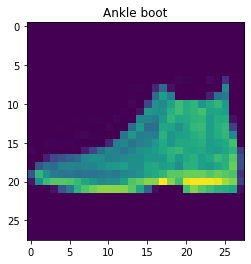

In [10]:
# make predict
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
title = class_names[np.argmax(predictions[0])]
plt.figure()
plt.title(title)
plt.imshow(test_images[0])
plt.show()